# Plotting Latest USGS Earthquake Events

Author: **Marcin Sikorski**<br>
Date: February, 2022

This notebook contains an introduction to the use of <code>Python</code> and <code>cartopy</code> to visualize data concerning earthquakes. We will first read a file with earthquake locations (latitudes, and longitudes), magnitudes in Richter scale, and depths, and other descriptors and then overlay it on a worldwide map.

The US Geological Survey (USGS) provides data on seismological events that occurred throughout the world at https://earthquake.usgs.gov/earthquakes/search/. For convenience, we have extracted data for past 90 days for earthquakes of magnitude larger than 4.5+ in CSV format.

**Report Content:**<br>
1. Setting Up the Virtual Environment and Earthquake Data<br>
2. Data Preprocessing and Cleaning<br>
3. Basic Analysis<br>
4. Mapping Earthquakes Worldwide<br>
5. Summary

### 1. Setting Up the Virtual Environment and Earthquake Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load earthquake events from CSV file
data = pd.read_csv('query.csv')

# show header and rows
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-02-10T16:16:15.825Z,-20.6864,-175.4586,10.00,4.9,mb,NaN,145.0,6.792,0.74,...,2022-02-10T17:07:13.040Z,"56 km NNW of Nuku‘alofa, Tonga",earthquake,15.8,1.9,0.064,76.0,reviewed,us,us
1,2022-02-10T10:27:32.765Z,-10.4350,-13.0618,10.00,5.4,mww,NaN,51.0,2.797,0.79,...,2022-02-10T12:30:17.501Z,Ascension Island region,earthquake,10.3,1.9,0.098,10.0,reviewed,us,us
2,2022-02-10T09:47:19.772Z,-20.3017,-174.4717,46.12,4.9,mb,NaN,102.0,6.857,1.10,...,2022-02-10T10:13:21.040Z,"55 km SSW of Pangai, Tonga",earthquake,6.2,8.9,0.092,37.0,reviewed,us,us
3,2022-02-10T09:38:32.883Z,23.9793,122.2855,22.31,4.6,mb,NaN,58.0,0.660,0.67,...,2022-02-10T10:47:24.040Z,"69 km E of Hualien City, Taiwan",earthquake,2.1,5.4,0.100,30.0,reviewed,us,us
4,2022-02-10T04:40:52.721Z,-34.2923,179.5410,10.00,5.1,mb,NaN,114.0,3.413,1.02,...,2022-02-10T04:58:53.040Z,south of the Kermadec Islands,earthquake,6.3,1.9,0.089,43.0,reviewed,us,us


### 2. Data Preprocessing and Cleaning

Now that our new dataframe is ready it is time to look up for some details and information about it.

In [3]:
# show data types for each column
print(data.dtypes)
# show number of rows and columns
data.shape

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object


(1968, 22)

In [4]:
# convert 'time' column to proper data type
data['time'] = pd.to_datetime(data['time'])

In [5]:
# basic descriptive statistics about dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1968.0,-3.144884,32.029100,-65.3437,-23.95325,-6.78645,25.076425,85.4705
longitude,1968.0,13.745944,126.227938,-179.9985,-93.26045,46.61320,128.966550,179.9901
depth,1968.0,54.208144,100.901807,0.0000,10.00000,10.00000,50.407500,644.7700
mag,1968.0,4.818933,0.373609,4.5000,4.60000,4.70000,4.900000,7.5000
nst,9.0,69.333333,36.732139,25.0000,47.00000,63.00000,90.000000,145.0000
gap,1957.0,87.960654,41.596268,10.0000,57.00000,80.00000,118.000000,261.0000
dmin,1955.0,4.694204,5.385577,0.0000,1.41500,2.89400,6.534500,43.1330
rms,1968.0,0.758283,0.234427,0.1000,0.58000,0.73000,0.920000,1.7000
horizontalError,1957.0,8.275811,2.901645,0.2200,6.30000,8.00000,10.100000,21.9000
depthError,1968.0,3.453089,2.410964,0.2000,1.80000,1.90000,5.200000,19.0000


In [6]:
# search and sum NaN values in columns
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1959
gap                  11
dmin                 13
rms                   0
net                   0
id                    0
updated               0
place                25
type                  0
horizontalError      11
depthError            0
magError             26
magNst               22
status                0
locationSource        0
magSource             0
dtype: int64

Our dataset looks complete and correct. We are mostly interested in <code>latitude</code>, <code>longitude</code> and <code>magnitude</code> columns for our geovisualization.

### 3. Basic Analysis

First, let's examine time series of various earthquakes. We will make a line plot of magnitudes.

<AxesSubplot:title={'center':'Latest Earthquake Events'}, xlabel='time'>

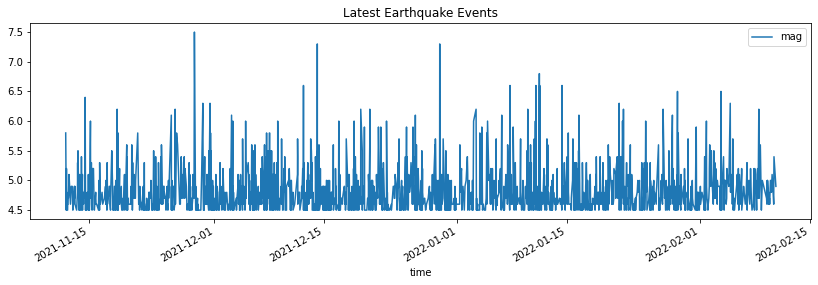

In [7]:
# time series of earthquakes
data.plot(x='time', y='mag', title='Latest Earthquake Events', figsize=(14,4))

There are no visible trends or patterns in this time series. Let's check the frequency of all earthquakes by magnitudes.

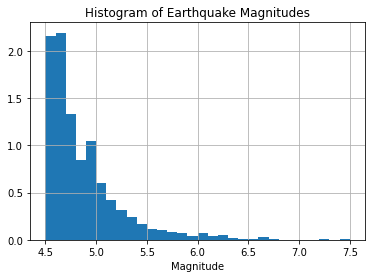

In [8]:
# histogram of magnitudes
data['mag'].hist(density=True, bins=30)
plt.xlabel('Magnitude')
plt.title("Histogram of Earthquake Magnitudes")
plt.show()

We can easily spot from this histogram that interarrival times follow an exponential distribution (or Poisson process). Predicting seismological events would be very difficult, if not impossible. For our luck, powerful earthquakes are not numerous.

### 4. Mapping Earthquakes Worldwide

It's time to proceed to the main part of this notebook and plot our earthquake events on a worldwide map using <code>cartopy</code> package. We will try two map projections and add Earth's lithosphere plate distribution.

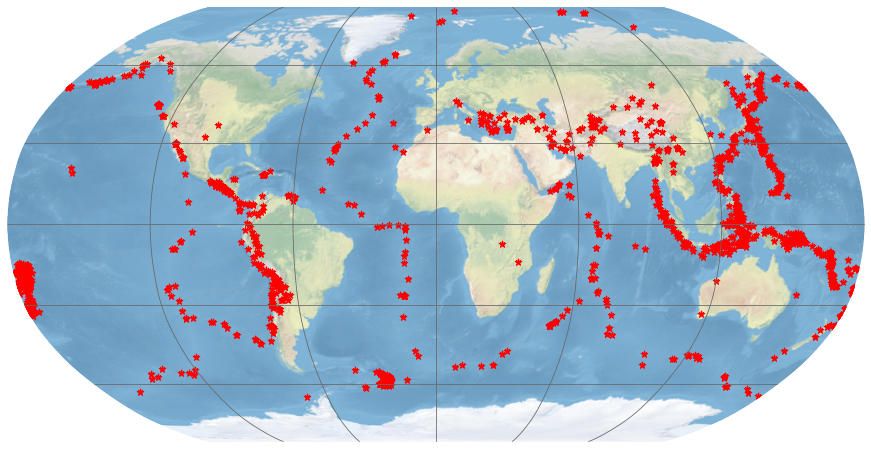

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# overview plot
fig = plt.figure(figsize=(18,8))

# output projection
ax = fig.add_subplot(111, projection=ccrs.Robinson())

# add map features
ax.axis('off')
ax.stock_img()
ax.gridlines(color='dimgray')

# plot markers
plt.scatter(x=data['longitude'], y=data['latitude'], alpha=1, color='red', s=50, marker='*', transform=ccrs.PlateCarree())
plt.show()

Earthquake epicenters occur mostly along tectonic plate boundaries. The theory of plate tectonics divides the Earth's lithosphere into more smaller plates of different sizes. We will plot these plates and check if our points overlay on plate borders. The coordinates are given in TXT format, so we will append them in one object and implement it on our map. Our data of plate borders can be downloaded at https://www.earthbyte.org/plate-boundaries/. For this notebook we will extract coordinates directly from website using <code>BeautifulSoup</code>.

In [10]:
import requests
from bs4 import BeautifulSoup

path = 'http://jules.unavco.org/GMT/'
reqs = requests.get(path)
soup = BeautifulSoup(reqs.text, 'html.parser')

# list of files with TXT extension
txt_files = []
for txt in soup.find_all('a'):
    txt_files.append(txt.get('href'))
    txt_files = [ext for ext in txt_files if '.txt' in ext]
    
# concat path with TXT files
urls = []
for i in txt_files:
    url = path + i
    urls.append(url)

# display final files
urls

['http://jules.unavco.org/GMT/African.txt',
 'http://jules.unavco.org/GMT/Antarctic.txt',
 'http://jules.unavco.org/GMT/Arabian.txt',
 'http://jules.unavco.org/GMT/Australian.txt',
 'http://jules.unavco.org/GMT/Caribbean.txt',
 'http://jules.unavco.org/GMT/Cocos.txt',
 'http://jules.unavco.org/GMT/Eurasian.txt',
 'http://jules.unavco.org/GMT/Indian.txt',
 'http://jules.unavco.org/GMT/Juan.txt',
 'http://jules.unavco.org/GMT/Nazca.txt',
 'http://jules.unavco.org/GMT/North_Am.txt',
 'http://jules.unavco.org/GMT/Pacific.txt',
 'http://jules.unavco.org/GMT/Philippine.txt',
 'http://jules.unavco.org/GMT/Scotia.txt',
 'http://jules.unavco.org/GMT/South_Am.txt']

In [11]:
from numpy import genfromtxt

# create list of arrays from TXT files
borders = []
for file in urls:
    border = genfromtxt(file, names=['lon', 'lat'], skip_header=0, comments=':', dtype=float)
    borders.append(border)

To make our earthquake markers stand out and make them much more readable, we will create simple functions describing their color and size by magnitude values.

In [12]:
# hex color function categorizing points by 'magnitude'
def circle_color(mag):
    if 4.5 >= mag <= 5.4:
        return '#EDDE00' # yellow
    elif 5.5 >= mag <= 6.4:
        return '#FF8000' # orange
    elif mag >= 6.5:
        return '#E41316' # red

# size function
def circle_size(mag):
    if 4.5 >= mag <= 5.4:
        return mag*10
    elif 5.5 >= mag <= 6.4:
        return mag*20
    elif mag >= 6.5:
        return mag*60

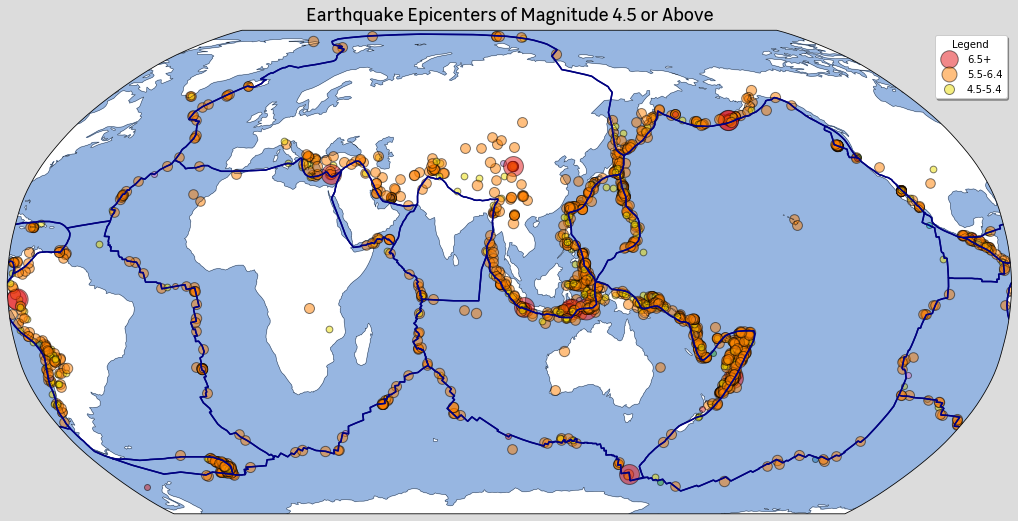

In [13]:
# 1st plot - Robinson projection
fig = plt.figure(figsize=(18,9), facecolor='gainsboro')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=100, globe=None))

# add map features
ax.axis('on')
ax.coastlines(linewidth=.3)
ax.add_feature(cfeature.OCEAN)

# plot plate boundaries
for border in borders:
    ax.plot(border['lon'], border['lat'], color='navy', transform=ccrs.Geodetic())

# plot markers
for row in data.itertuples():
    ax.scatter(x=row.longitude, y=row.latitude, s=circle_size(row.mag), alpha=.5, edgecolors='black',
                            color=circle_color(row.mag), transform=ccrs.PlateCarree())

# create legend
from matplotlib.lines import Line2D

legend_elements = [Line2D([0],[0], color='#E41316', markeredgecolor='black', marker='.', linestyle='None', alpha=.5,
                          markersize=35, label='6.5+'),
                   Line2D([0],[0], color='#FF8000', markeredgecolor='black', marker='.', linestyle='None', alpha=.5,
                          markersize=30, label='5.5-6.4'),
                   Line2D([0],[0], color='#EDDE00', markeredgecolor='black', marker='.', linestyle='None', alpha=.5,
                          markersize=20, label='4.5-5.4')]
plt.legend(handles=legend_elements, loc='upper right', title='Legend', ncol=1, shadow=True)

# create title
font = {'color': 'black', 'weight': 'normal', 'size': 18, 'ha': 'center', 'fontname': 'Leroy Merlin Sans'}
plt.title('Earthquake Epicenters of Magnitude 4.5 or Above', loc='center', fontdict=font, pad=10)
plt.show()

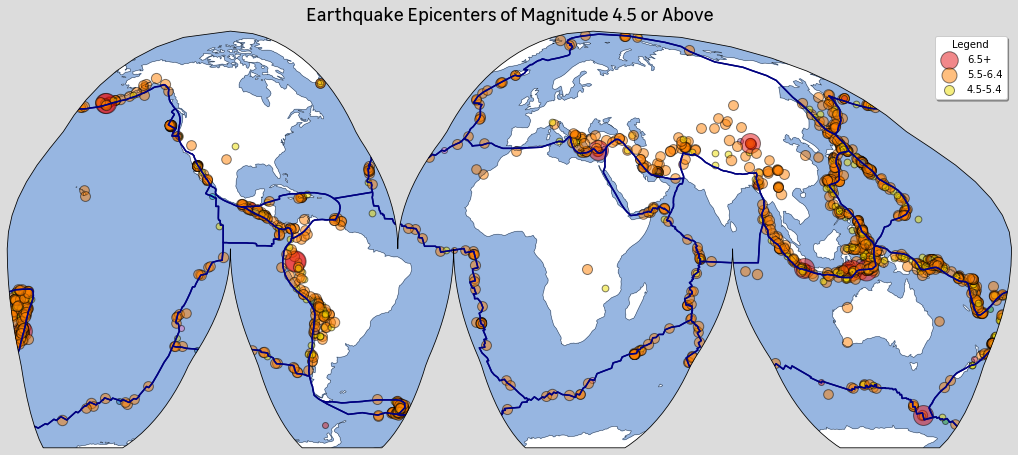

In [14]:
# 2nd plot - Goode homolosine projection
fig = plt.figure(figsize=(18,9), facecolor='gainsboro')
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine(central_longitude=0, globe=None))

# add map features
ax.axis('on')
ax.coastlines(linewidth=.3)
ax.add_feature(cfeature.OCEAN)

# plot plate boundaries
for border in borders:
    ax.plot(border['lon'], border['lat'], color='navy', transform=ccrs.Geodetic())

# plot markers
for row in data.itertuples():
    ax.scatter(x=row.longitude, y=row.latitude, s=circle_size(row.mag), alpha=.5, edgecolors='black',
                            color=circle_color(row.mag), transform=ccrs.PlateCarree())

# add legend
plt.legend(handles=legend_elements, loc='upper right', title='Legend', ncol=1, shadow=True)    

# add title
plt.title('Earthquake Epicenters of Magnitude 4.5 or Above', loc='center', fontdict=font, pad=10)
plt.show()

### 5. Summary

Indeed, seismological events mainly occur on tectonic plate boundaries and rarely happen abroad. They are especially dense on the Pacific Ring of Fire and on Australian-Pacific border.

This notebook represented how to efficiently plot and process geospatial data. First, we obtained real earthquake data for latest 90 days provided by USGS in CSV format. Using <code>pandas</code> we loaded the dataset, cleaned it and performed basic analysis to find any trends. Next, we started mapping our epicenter points. We drafted plate boundaries for more insights and implemented marker functions to highlight them. Plot features and legend were customized for our needs. Finally, the maps with earthquake points were plotted. These two figures were made in <code>cartopy</code> library and we successfully plotted them with different projections: Robinson and Goode homolosine.

Further map customization is possible and it is ony a matter of individual preferences. At these forms they should be easy to interpretate by any reader. This project was made for academical and spare time purposes. It should find useness in fields like: geodynamics, GIS, seismology, physics or data science.